In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('Social_Network_Ads.csv')

In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [23]:
df.describe().round(2)

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [24]:
df.drop('User ID',axis=1, inplace=True)

In [25]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [26]:
df.describe().round(2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


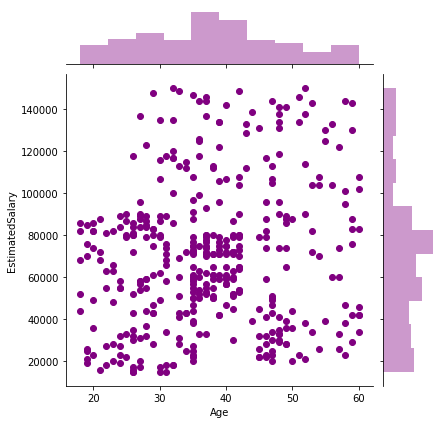

In [27]:
sns.jointplot(x='Age', y='EstimatedSalary', data=df, color='purple')

<Figure size 864x576 with 0 Axes>

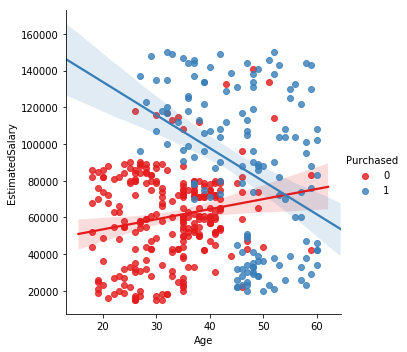

In [29]:
plt.figure(figsize=(12,8))
sns.lmplot(x='Age', y='EstimatedSalary',data=df, hue='Purchased',palette='Set1')

## Spliting the data set into dependent and independent data set

In [30]:
X=df.iloc[:,0:-1].values

In [32]:
y=df.iloc[:,-1]

## Dealing with Categorical features with Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
X[:,0]=le.fit_transform(X[:,0])

## Training the data Set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test =train_test_split( X,y,test_size=0.3, random_state=100)

## Machine learning algorithm 

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [47]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
y_pred=classifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.87      0.73      0.80        45

   micro avg       0.86      0.86      0.86       120
   macro avg       0.86      0.83      0.84       120
weighted avg       0.86      0.86      0.86       120



In [53]:
print(confusion_matrix(y_test,y_pred))

[[70  5]
 [12 33]]


In [54]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.87      0.73      0.80        45

   micro avg       0.86      0.86      0.86       120
   macro avg       0.86      0.83      0.84       120
weighted avg       0.86      0.86      0.86       120

[[70  5]
 [12 33]]
